In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-patient-precondition-dataset/covid.csv
/kaggle/input/covid19-patient-precondition-dataset/Description.xlsx
/kaggle/input/covid19-patient-precondition-dataset/Catalogs.xlsx


In [27]:
from datetime import datetime
# datetime.strptime('2012-07-12', '%Y-%m-%d').timetuple()
Df = pd.read_csv('/kaggle/input/covid19-patient-precondition-dataset/covid.csv').sample(frac=1)
Df['died'] = (Df['date_died'].astype('string') != '9999-99-99').astype(int)
Df['date_symptoms'] = pd.to_datetime(Df['date_symptoms'] ,format='%d-%m-%Y')
Df['entry_date'] = pd.to_datetime(Df['entry_date'],format='%d-%m-%Y')

Df['time_to_admission'] = (Df['entry_date'] - Df['date_symptoms']).dt.days
Df

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died,time_to_admission
34013,0d8466,1,1,2020-06-22,2020-06-20,9999-99-99,97,2,48,2,...,2,2,2,2,2,2,1,97,0,2
295058,7.70E+42,1,1,2020-04-15,2020-04-12,9999-99-99,97,2,4,2,...,2,2,2,2,2,1,2,97,0,3
110724,184943,2,2,2020-05-23,2020-05-20,9999-99-99,2,2,57,97,...,2,2,2,2,1,99,1,2,0,3
333145,0d98bd,2,1,2020-05-19,2020-05-18,9999-99-99,97,2,66,97,...,2,2,2,2,2,2,2,97,0,1
376222,0d2d42,1,1,2020-05-25,2020-05-22,9999-99-99,97,2,40,1,...,2,2,2,2,2,1,2,97,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510587,177104,2,1,2020-06-25,2020-06-24,9999-99-99,97,2,35,97,...,2,2,2,2,2,1,3,97,0,1
260192,179694,1,1,2020-06-03,2020-05-31,9999-99-99,97,2,29,2,...,2,2,2,2,2,99,2,97,0,3
199028,132a10,1,2,2020-06-02,2020-06-02,9999-99-99,2,2,34,2,...,2,2,2,2,2,99,1,2,0,0
55501,18217a,2,1,2020-05-26,2020-05-22,9999-99-99,97,2,43,97,...,2,2,1,2,2,99,1,97,0,4


In [28]:
ord_cols = {'id','entry_date','date_symptoms','date_died','died','time_to_admission','age'}
cat_cols = []
for col in Df.columns:
    if col in ord_cols:
        continue
    cat_cols.append(col)
print(cat_cols)
df_ohe = pd.get_dummies(Df,columns=cat_cols,drop_first=True)
df_ohe = df_ohe.drop(columns = ['id','entry_date','date_symptoms','date_died'])
df_ohe

['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu']


,age,died,time_to_admission,sex_2,patient_type_2,intubed_2,intubed_97,intubed_99,pneumonia_2,pneumonia_99,...,renal_chronic_98,tobacco_2,tobacco_98,contact_other_covid_2,contact_other_covid_99,covid_res_2,covid_res_3,icu_2,icu_97,icu_99
34013,48,0,2,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
295058,4,0,3,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
110724,57,0,3,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
333145,66,0,1,1,0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
376222,40,0,3,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510587,35,0,1,1,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
260192,29,0,3,0,0,0,1,0,1,0,...,0,1,0,0,1,1,0,0,1,0
199028,34,0,0,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
55501,43,0,4,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [29]:
from sklearn.model_selection import train_test_split as tts
from imblearn.over_sampling import RandomOverSampler 


X_train, X_test, y_train, y_test = tts(
    df_ohe.drop(columns = ['died']), df_ohe['died'], test_size=0.20, random_state=42)
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)

In [19]:
np.sum((y_res == 0).astype(int))

424402

In [30]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
clf = RFC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(cr(y_test,y_pred))
y_pred = clf.predict(X_train)
print(cr(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    106119
           1       0.51      0.37      0.43      7202

    accuracy                           0.94    113321
   macro avg       0.73      0.67      0.70    113321
weighted avg       0.93      0.94      0.93    113321

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    424307
           1       0.92      0.82      0.87     28974

    accuracy                           0.98    453281
   macro avg       0.95      0.91      0.93    453281
weighted avg       0.98      0.98      0.98    453281



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='died', ylabel='age'>

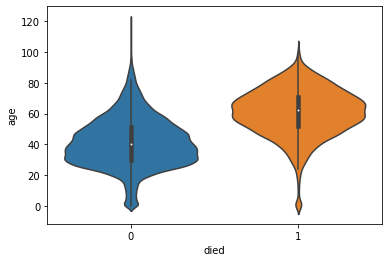

In [31]:
import seaborn as sns

sns.violinplot(y_test, X_test['age'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC